In [26]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import json
from datetime import datetime

from data_helpers.syntax_graph import SyntaxGraph
from data_helpers.nc21_reader import Nc21Reader

# functions for creating database and collecting collocations
from collect_functions_1 import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tabel 1 andmete kogumine

In [27]:
%%time
# takes ca 2 mins
file_name = 'data/nc21_Fiction.vert_10'

my_nc21_reader = Nc21Reader(
   file_name = file_name
)

CPU times: user 22 µs, sys: 8 µs, total: 30 µs
Wall time: 33.1 µs


TSV lines:   0%|          | 0/336 [00:00<?, ?it/s]

data/nc21_Fiction.vert_10
------------------------

{'id': 1, 'lemma': 'Katharine', 'pos': 'H', 'deprel': 'obl', 'form': 'Katharine', 'feats': {'prop': 'prop', 'sg': 'sg', 'nom': 'nom'}, 'verbform': None}
{'id': 5, 'lemma': 'kuri', 'pos': 'S', 'deprel': 'root', 'form': 'kurjast', 'feats': {'com': 'com', 'sg': 'sg', 'el': 'el'}, 'verbform': None}
{'id': 2, 'lemma': 'de', 'pos': 'H', 'deprel': 'flat', 'form': 'de', 'feats': {'prop': 'prop'}, 'verbform': None}
{'id': 3, 'lemma': 'Mattonen', 'pos': 'H', 'deprel': 'flat', 'form': 'Mattosele', 'feats': {'prop': 'prop', 'sg': 'sg', 'all': 'all'}, 'verbform': None}
{'id': 4, 'lemma': 'olema', 'pos': 'V', 'deprel': 'cop', 'form': 'On', 'feats': {'mod': 'mod', 'indic': 'indic', 'pres': 'pres', 'ps3': 'ps3', 'sg': 'sg', 'ps': 'ps', 'af': 'af'}, 'verbform': 'b'}
{}
{'id': 6, 'lemma': 'käsulaud', 'pos': 'S', 'deprel': 'obj', 'form': 'käsulaudu', 'feats': {'com': 'com', 'pl': 'pl', 'part': 'part'}, 'verbform': None}
{'id': 7, 'lemma': 'lõhkuma', 'po

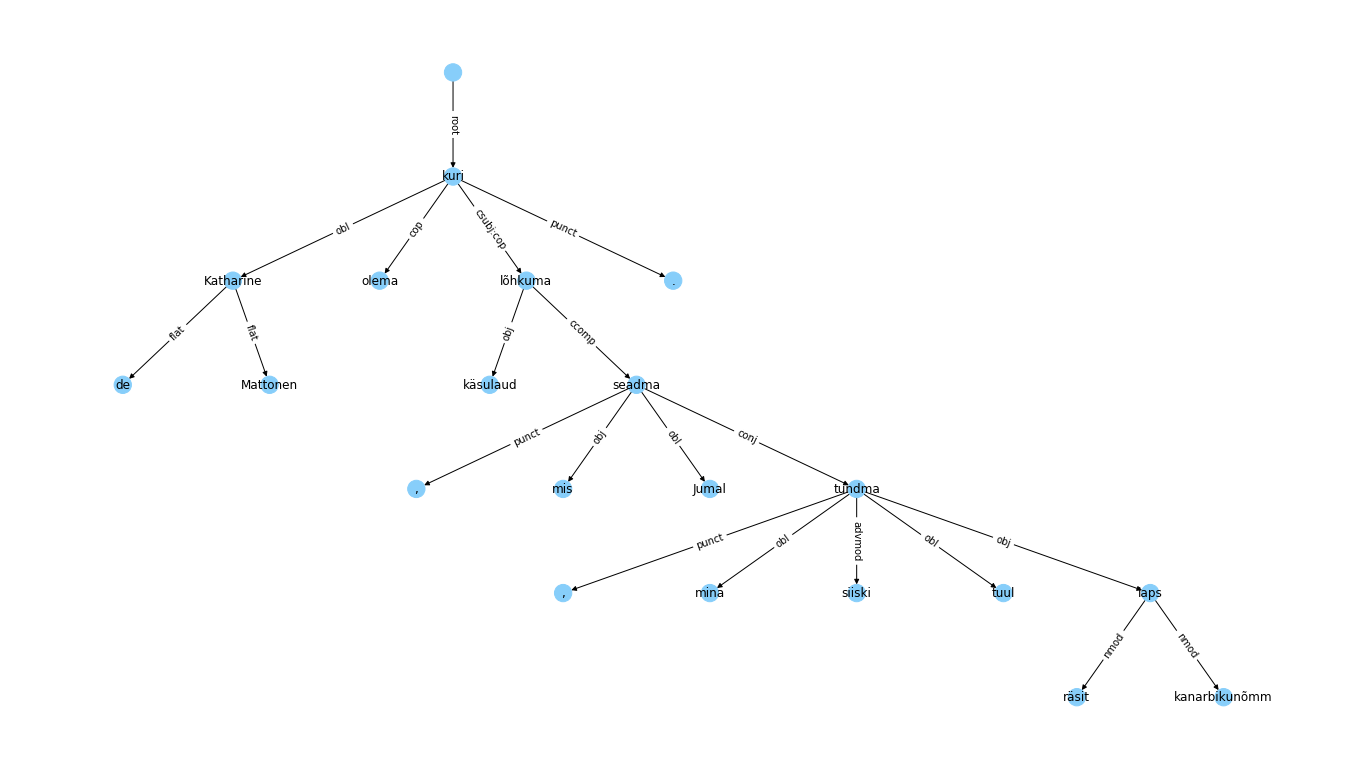

TSV lines:   8%|▊         | 26/336 [00:00<00:05, 53.09it/s]

('olema', '', '', '', '', '', '', '', '', '') 1
('lõhkuma', '', 'obj', 'part', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'obj', 'part', '', '', 'ccomp', '<käändumatu>', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'ccomp', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'conj', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('

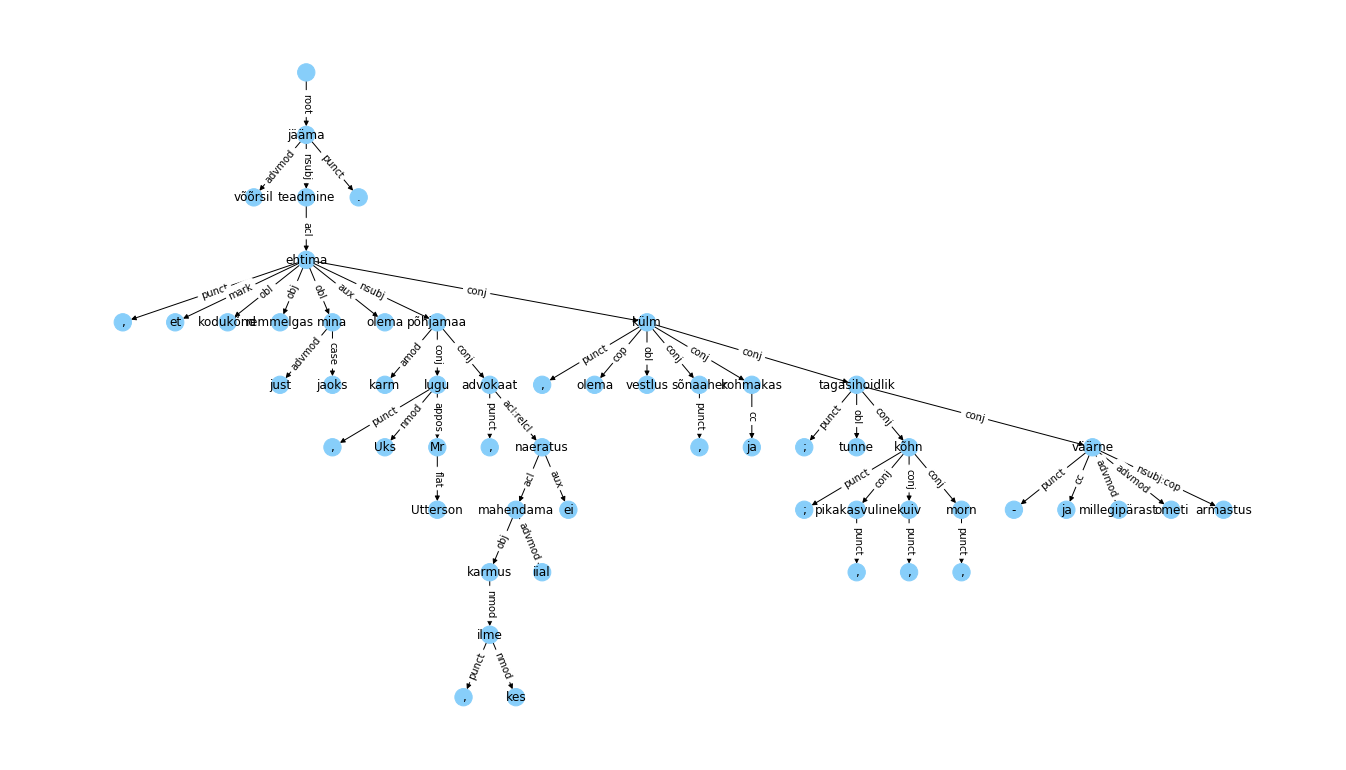

TSV lines:  28%|██▊       | 95/336 [00:01<00:04, 59.89it/s]

('olema', '', '', '', '', '', '', '', '', '') 3
('lõhkuma', '', 'obj', 'part', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'obj', 'part', '', '', 'ccomp', '<käändumatu>', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'ccomp', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'conj', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('

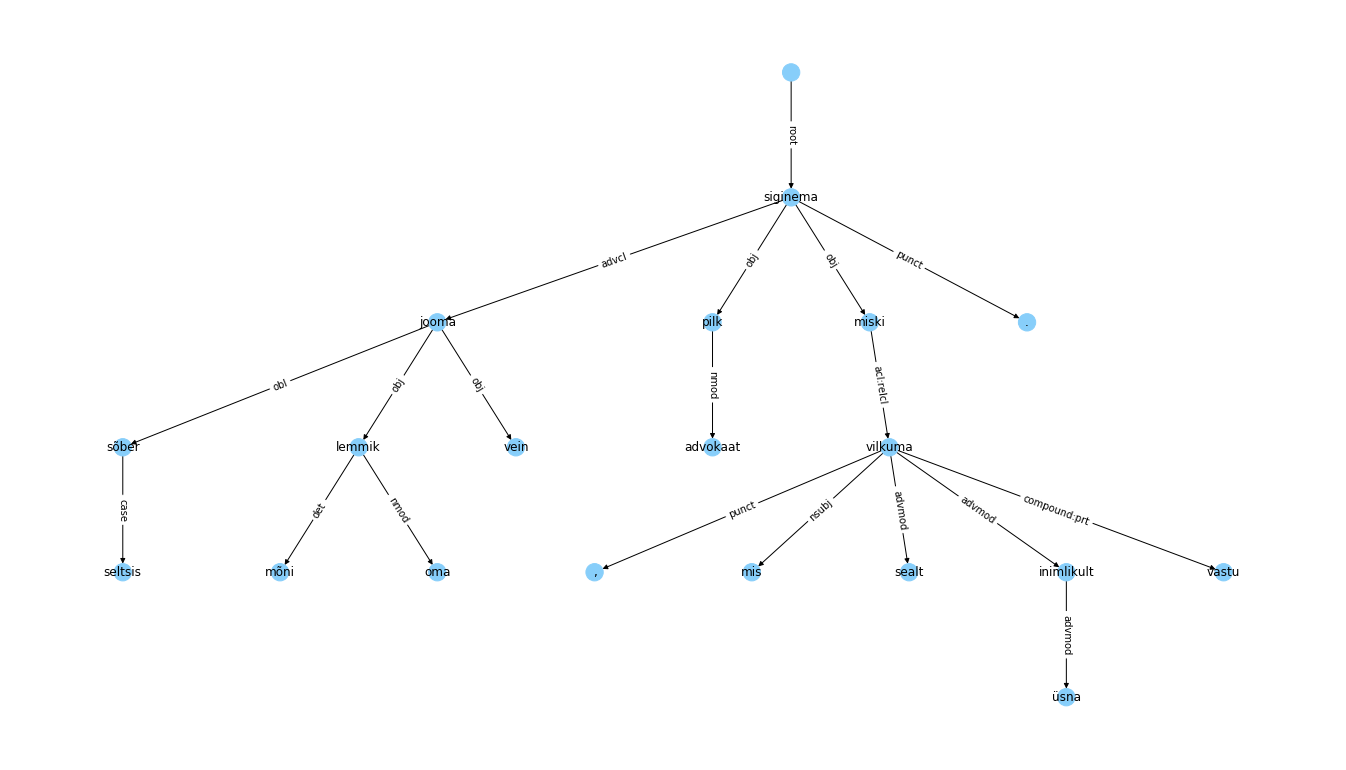

TSV lines:  35%|███▌      | 118/336 [00:01<00:03, 55.78it/s]

('olema', '', '', '', '', '', '', '', '', '') 3
('lõhkuma', '', 'obj', 'part', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'obj', 'part', '', '', 'ccomp', '<käändumatu>', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'ccomp', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'conj', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('

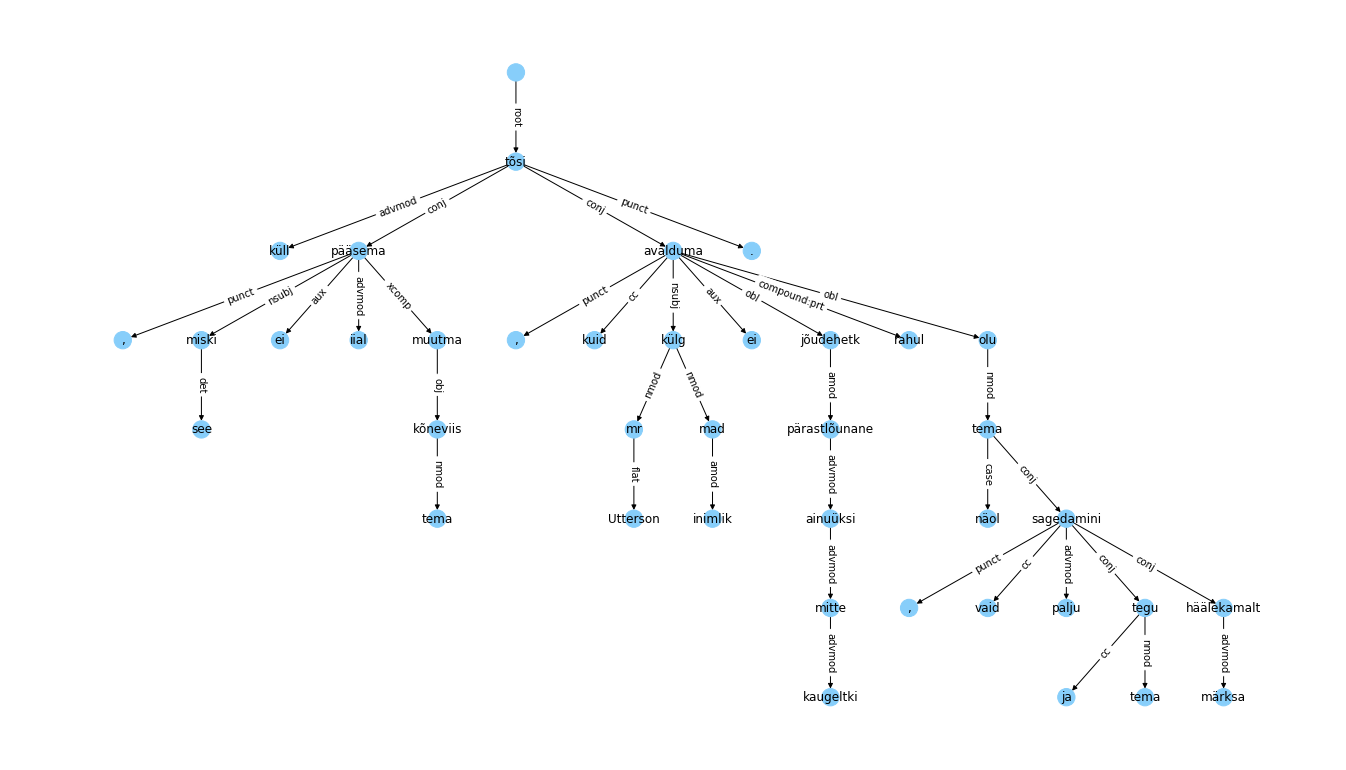

TSV lines:  49%|████▊     | 163/336 [00:02<00:02, 58.88it/s]

('olema', '', '', '', '', '', '', '', '', '') 3
('lõhkuma', '', 'obj', 'part', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'obj', 'part', '', '', 'ccomp', '<käändumatu>', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'ccomp', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'conj', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('

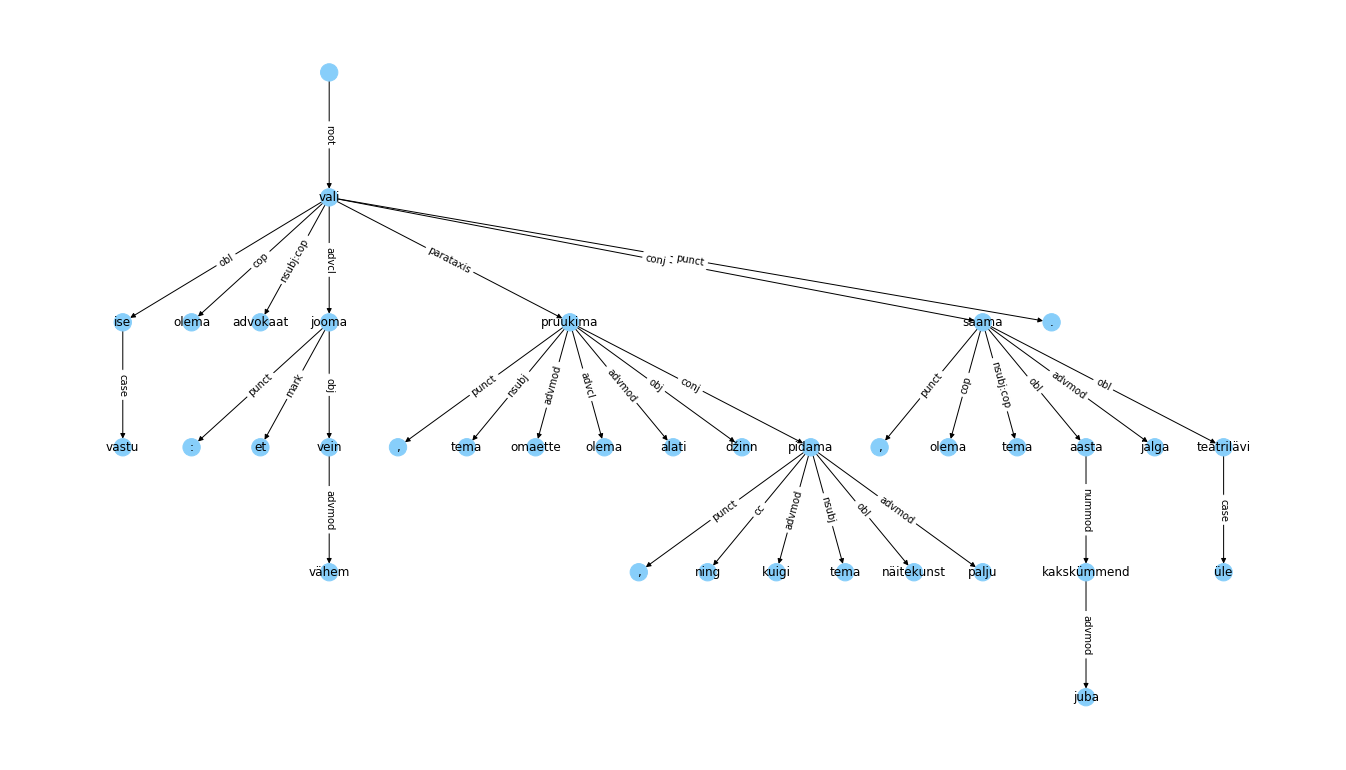

TSV lines:  61%|██████    | 205/336 [00:03<00:02, 59.31it/s]

('olema', '', '', '', '', '', '', '', '', '') 6
('lõhkuma', '', 'obj', 'part', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'obj', 'part', '', '', 'ccomp', '<käändumatu>', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'ccomp', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'conj', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('

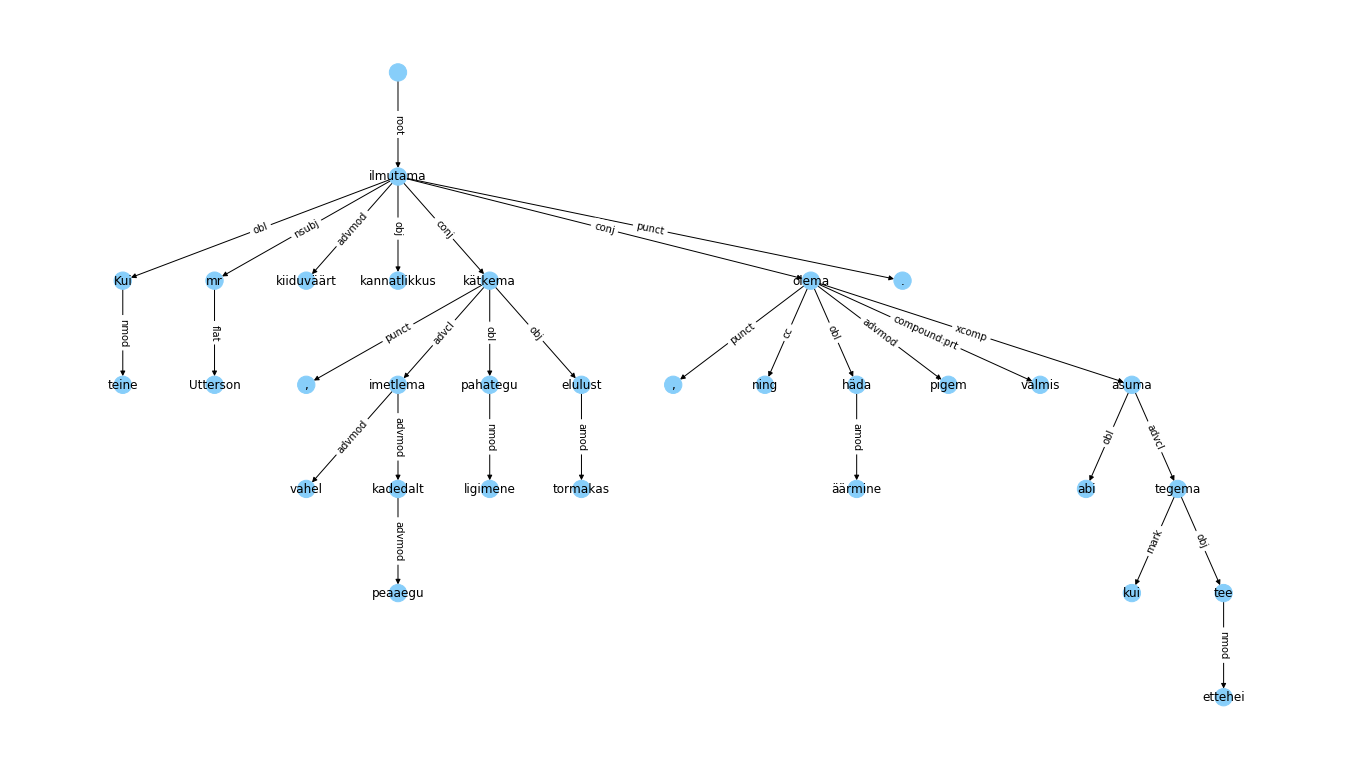

TSV lines:  72%|███████▏  | 241/336 [00:03<00:01, 58.18it/s]

('olema', '', '', '', '', '', '', '', '', '') 6
('lõhkuma', '', 'obj', 'part', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'obj', 'part', '', '', 'ccomp', '<käändumatu>', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'ccomp', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'conj', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('

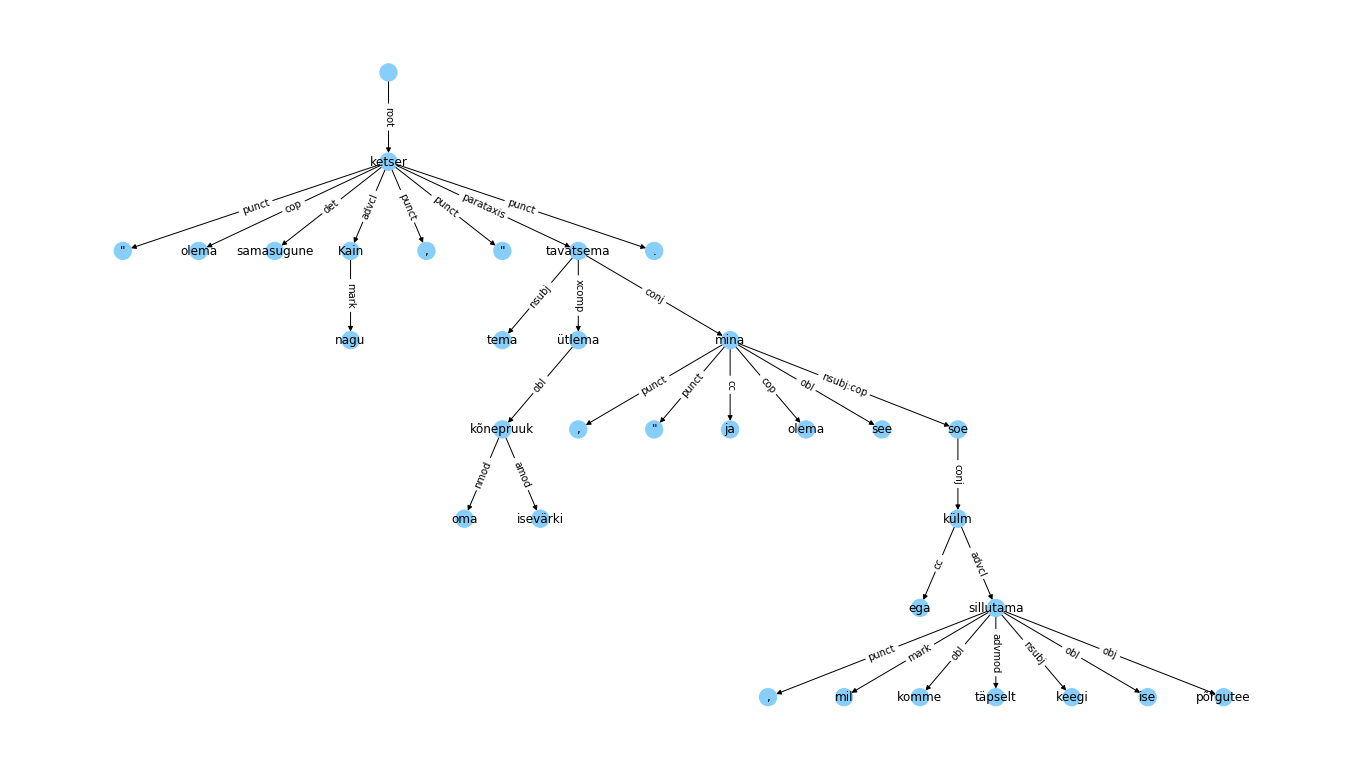

TSV lines:  84%|████████▍ | 282/336 [00:04<00:00, 58.98it/s]

('olema', '', '', '', '', '', '', '', '', '') 8
('lõhkuma', '', 'obj', 'part', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'obj', 'part', '', '', 'ccomp', '<käändumatu>', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'ccomp', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'conj', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('

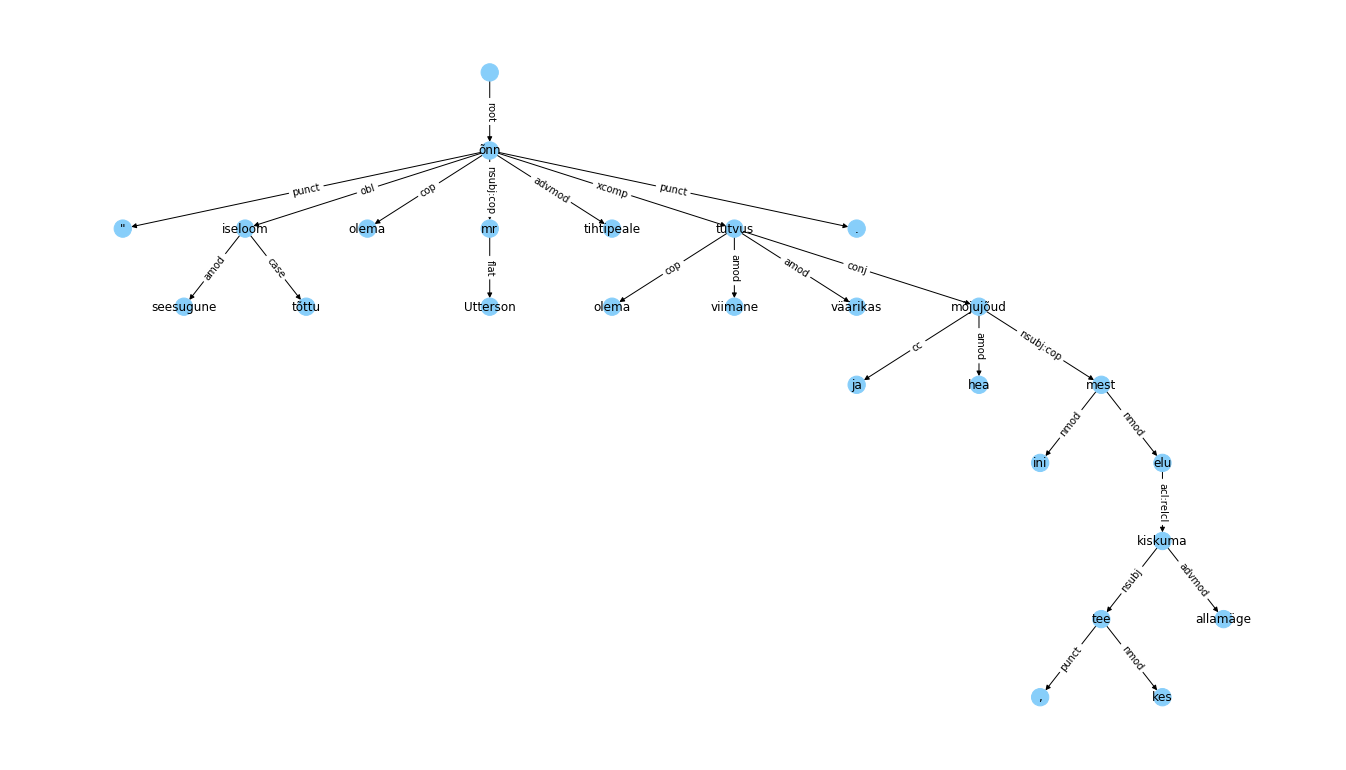

TSV lines:  93%|█████████▎| 311/336 [00:05<00:00, 55.47it/s]

('olema', '', '', '', '', '', '', '', '', '') 10
('lõhkuma', '', 'obj', 'part', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'obj', 'part', '', '', 'ccomp', '<käändumatu>', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'ccomp', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'conj', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
(

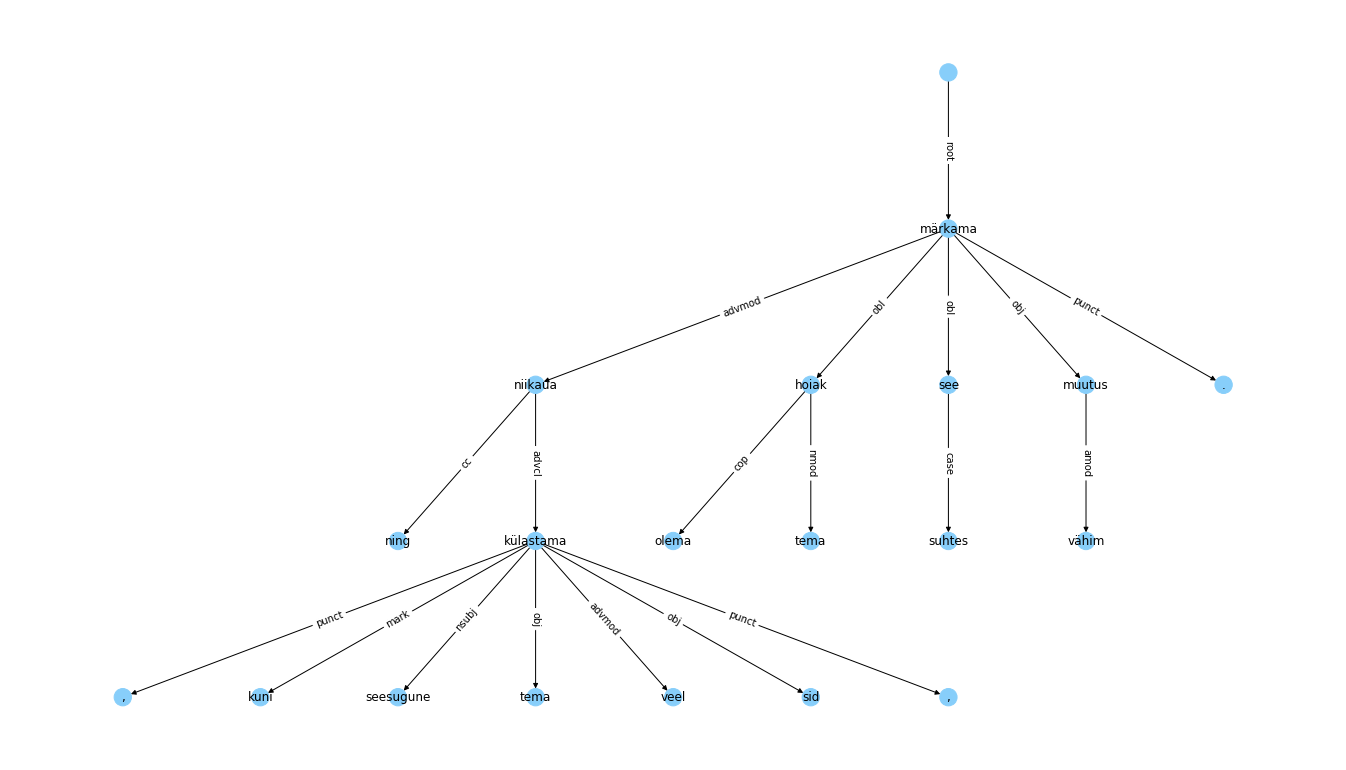

TSV lines: 100%|██████████| 336/336 [00:05<00:00, 60.29it/s]

('olema', '', '', '', '', '', '', '', '', '') 11
('lõhkuma', '', 'obj', 'part', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'obj', 'part', '', '', 'ccomp', '<käändumatu>', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'obj', 'part', '', '') 1
('lõhkuma', '', 'ccomp', '<käändumatu>', '', '', 'ccomp', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'punct', '<käändumatu>', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'punct', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obj', 'nom', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'conj', '<käändumatu>', '', '') 1
('seadma', '', 'obj', 'nom', '', '', 'obl', 'el', '', '') 1
('seadma', '', 'conj', '<käändumatu>', '', '', 'punct', '<käändumatu>', '', '') 1
(

<Figure size 1332x756 with 0 Axes>

In [28]:
"""
for sentence_id, text in my_nc21_reader.get_sentences():
    print(sentence_id)
    text.draw_graph()
    break
"""

TYPE = 'obl_verb'
TABLENAME = f'{TYPE}'
BATCH_SIZE = 50000

date_time = datetime.now().strftime("%Y%m%d-%H%M%S")
db_file_name = f"v12_nc21_Fiction_{TYPE}_collocations_{date_time}.db"
my_sqlite_db = DbMethods(db_file_name=db_file_name, table1_name=TYPE, table2_name=TYPE+'_examples')
my_sqlite_db.prep_coll_db()


collocations = {}
count = 1
for collection_id, graph in my_nc21_reader.get_sentences():
    count += 1
    print('------------------------')
    print(str(graph))
    for n in graph.nodes: print(graph.nodes[n])
    graph.draw_graph()
    
    collocations, = extract_something(graph, collection_id, collocations )
    if not collection_id == 0 and not collection_id % BATCH_SIZE:
        my_sqlite_db.save_coll_to_db(collocations, collection_id)
        collocations = {}
    for c in collocations:
        print(c, collocations[c]['total'])
    #if count > 10:
    #    break
    
    print()
    


# saving last batch
my_sqlite_db.save_coll_to_db(collocations, collection_id)
collocations = {}
my_sqlite_db.index_fields()


In [19]:
collection_id

9